In [1]:
# Imports
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# Style
sns.set_style("darkgrid")
sns.set_context("paper")



In [3]:
error_vs_epoch_data = pd.DataFrame()
error_vs_epoch_dir = "data/epochs-vs-error"

loss_vs_epoch_data = pd.DataFrame()
loss_vs_epoch_dir = "data/epochs-vs-loss"

time_vs_epoch_data = pd.DataFrame()
time_vs_epoch_dir = "data/epochs-vs-time"

lr_vs_epoch_data = pd.DataFrame()
lr_vs_epoch_dir = "data/epochs-vs-lr"

train_time_dir = "data/training_time"

files = [
    "lenet",
    "googlenet",
    "resnet_18",
    "resnet_34",
    "resnet_50",
    "googlenet_pretrained",
]

for file in files:
    error = pd.read_csv(f"{error_vs_epoch_dir}/{file}.csv")
    loss = pd.read_csv(f"{loss_vs_epoch_dir}/{file}.csv")
    time = pd.read_csv(f"{time_vs_epoch_dir}/{file}.csv")
    lr = pd.read_csv(f"{lr_vs_epoch_dir}/{file}.csv")

    error_vs_epoch_data[file] = error["Value"]
    loss_vs_epoch_data[file] = loss["Value"]
    time_vs_epoch_data[file] = time["Value"]
    lr_vs_epoch_data[file] = lr["Value"]


# Load time data
training_time_data = pd.read_csv(f"{train_time_dir}/training_time.csv")

print(training_time_data.head())

error_vs_epoch_data.index = np.arange(1, len(error_vs_epoch_data) + 1)
loss_vs_epoch_data.index = np.arange(1, len(loss_vs_epoch_data) + 1)
time_vs_epoch_data.index = np.arange(1, len(time_vs_epoch_data) + 1)
lr_vs_epoch_data.index = np.arange(1, len(lr_vs_epoch_data) + 1)



                  Model     Time
0             googlenet  3609.71
1                 lenet   276.64
2  googlenet_pretrained  1882.99
3             resnet_34  1583.20
4             resnet_50  2278.92


Text(0, 0.5, 'Angular Error')

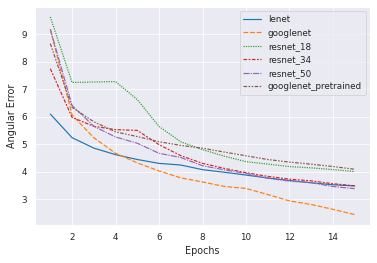

In [4]:
# Plot error

error_epoch_plot = sns.lineplot(data=error_vs_epoch_data)
error_epoch_plot.set_xlabel("Epochs")
error_epoch_plot.set_ylabel("Angular Error")

(0.0, 0.0125)

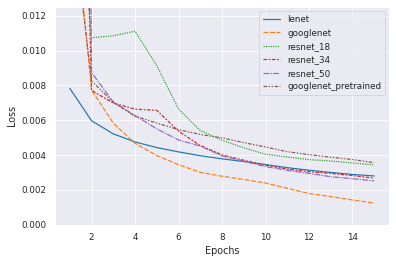

In [5]:
# Plot loss

loss_vs_epoch_data = sns.lineplot(data=loss_vs_epoch_data)
loss_vs_epoch_data.set_xlabel("Epochs")
loss_vs_epoch_data.set_ylabel("Loss")
loss_vs_epoch_data.set_ylim(0, 0.0125)

Text(0, 0.5, 'Time')

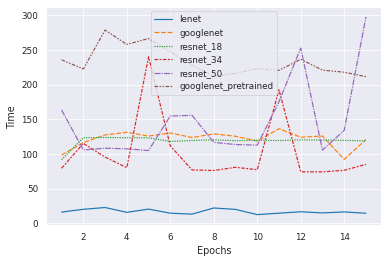

In [6]:
# Plot time

time_vs_epoch_data = sns.lineplot(data=time_vs_epoch_data)
time_vs_epoch_data.set_xlabel("Epochs")
time_vs_epoch_data.set_ylabel("Time")


Text(0, 0.5, 'Learning Rate')

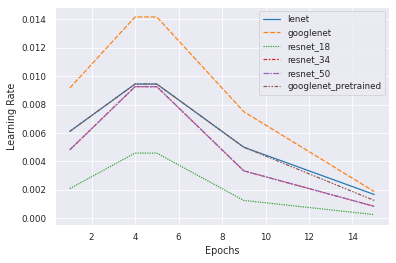

In [7]:
# Plot lr

lr_vs_epoch_data = sns.lineplot(data=lr_vs_epoch_data)
lr_vs_epoch_data.set_xlabel("Epochs")
lr_vs_epoch_data.set_ylabel("Learning Rate")


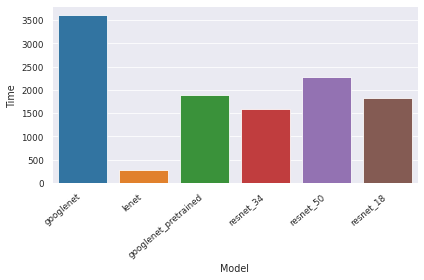

In [8]:
# Plot training time per model
ax = sns.barplot(x="Model", y="Time", data=training_time_data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()